In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv("best_alignments_2.0_with_similarity.csv")

# Column indices:
# 0 = human gene
# 6 = % identity
# 7 = % similarity



In [4]:
df

,human gene,zebrafish gene,matched,similarity,mismatched,failed alignments,% identity,% similarity,best class alignment
0,ACKR3,ackr3a,10,12,2,2,83.33,100.00,Class_A
1,ACKR3,ackr3a,17,19,2,4,89.47,100.00,Class_B1
2,ACKR3,ackr3a,15,19,4,2,78.95,100.00,Class_C
3,ACKR3,ackr3b,9,11,2,3,81.82,100.00,Class_A
4,ACKR3,ackr3b,15,15,0,8,100.00,100.00,Class_B1
...,...,...,...,...,...,...,...,...,...
650,VIPR2,vipr2,23,24,1,2,95.83,100.00,Class_B1
651,VIPR2,vipr2,4,4,0,3,100.00,100.00,Class_F
652,XCR1,xcr1a.1,11,13,8,1,57.89,68.42,Class_A
653,XCR1,xcr1b.1,9,12,9,2,50.00,66.67,Class_A


<Figure size 1200x600 with 0 Axes>

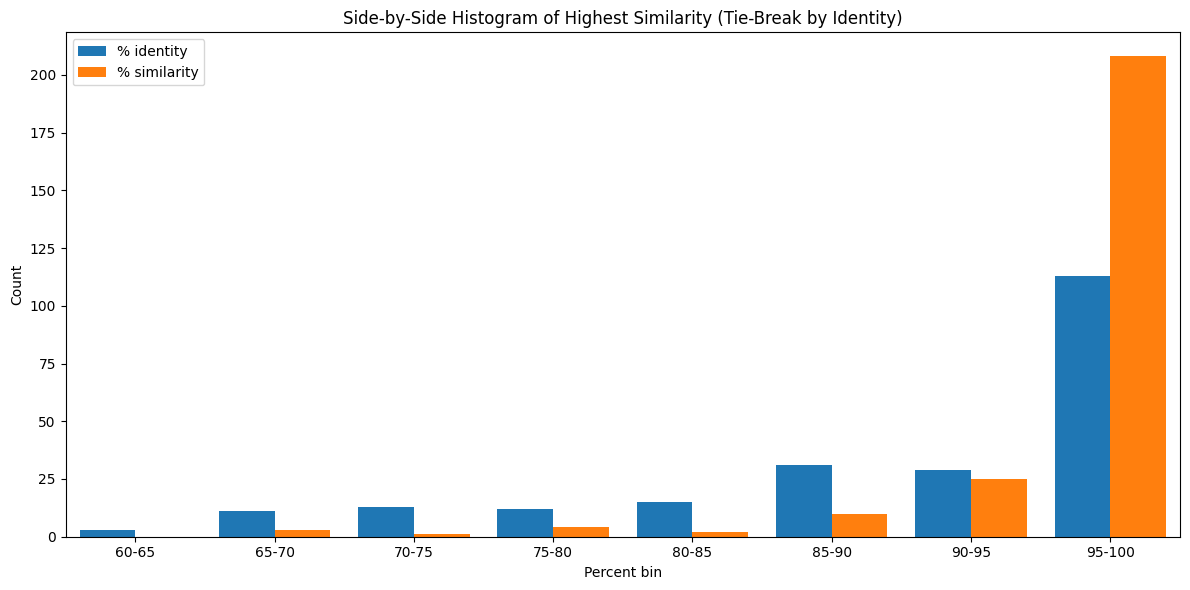

In [33]:
# Step 1 — keep only highest %identity row per unique human gene
df_best = df.loc[df.groupby(df.columns[0])[df.columns[6]].idxmax()]

identity = df_best.iloc[:, 6].values
similarity = df_best.iloc[:, 7].values

# Step 2 — define 5% bins
bins = np.arange(0, 105, 5)

# Step 3 — compute histogram counts manually
id_counts, _ = np.histogram(identity, bins=bins)
sim_counts, _ = np.histogram(similarity, bins=bins)

# bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# bar width (smaller so both fit side by side)
width = 2.0

plt.figure(figsize=(12, 6))


""""
# Side-by-side bars
plt.bar(bin_centers - width, id_counts, width=width, label="% identity")
plt.bar(bin_centers + width, sim_counts, width=width, label="% similarity")

plt.xlabel("Percent Identity or Similarity Bins")
plt.ylabel("Systems Count")
#plt.title("Side-by-Side Histogram of Best % Identity and % Similarity")
plt.xticks(bins)
plt.legend()
plt.tight_layout()
plt.show()
"""
# define bin edges and centers
bins = np.arange(0, 105, 5)
bin_centers = (bins[:-1] + bins[1:]) / 2

# select only bins 60–100
mask = bins[:-1] >= 60
bin_centers_plot = bin_centers[mask]
id_counts_plot = id_counts[mask]
sim_counts_plot = sim_counts[mask]

# create bin labels like "60–65", "65–70", ...
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
bin_labels_plot = [bin_labels[i] for i in range(len(bin_labels)) if mask[i]]


# bar width and small offset
width = 2.0

plt.figure(figsize=(12, 6))

#plt.bar(bin_centers  - width/2, id_counts, width=width, label="% identity")
#plt.bar(bin_centers  + width/2, sim_counts, width=width, label="% similarity")

plt.bar(bin_centers  - width/2, id_counts, width=width, label="% identity")
plt.bar(bin_centers  + width/2, sim_counts, width=width, label="% similarity")

plt.xticks(bin_centers_plot, bin_labels_plot)

plt.xlabel("Percent bin")
plt.ylabel("Count")
plt.title("Side-by-Side Histogram of Highest Similarity (Tie-Break by Identity)")
#plt.xticks(bins)
plt.xlim(60, 100)  # ensure full visibility of last bars
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

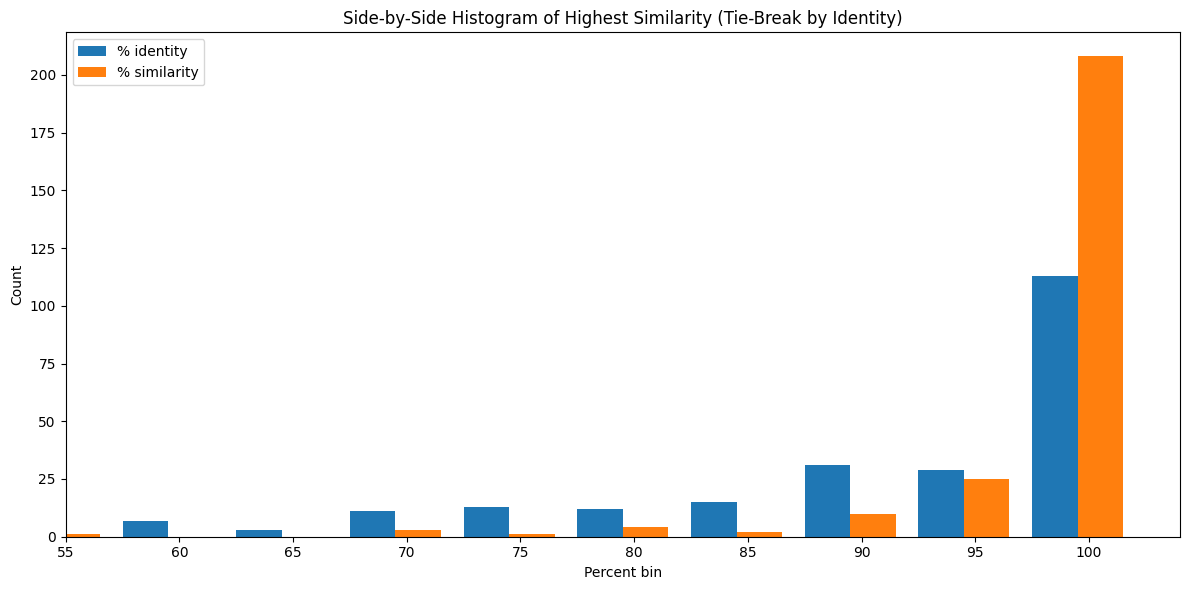

In [26]:
# Step 1 — keep only highest %identity row per unique human gene
df_best = df.loc[df.groupby(df.columns[0])[df.columns[6]].idxmax()]

identity = df_best.iloc[:, 6].values
similarity = df_best.iloc[:, 7].values

# Step 2 — define 5% bins
bins = np.arange(0, 105, 5)

# Step 3 — compute histogram counts manually
id_counts, _ = np.histogram(identity, bins=bins)
sim_counts, _ = np.histogram(similarity, bins=bins)

# bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# bar width (smaller so both fit side by side)
width = 2.0

plt.figure(figsize=(12, 6))


""""
# Side-by-side bars
plt.bar(bin_centers - width, id_counts, width=width, label="% identity")
plt.bar(bin_centers + width, sim_counts, width=width, label="% similarity")

plt.xlabel("Percent Identity or Similarity Bins")
plt.ylabel("Systems Count")
#plt.title("Side-by-Side Histogram of Best % Identity and % Similarity")
plt.xticks(bins)
plt.legend()
plt.tight_layout()
plt.show()
"""

# bar width and small offset
width = 2.0

plt.figure(figsize=(12, 6))

#plt.bar(bin_centers  - width/2, id_counts, width=width, label="% identity")
#plt.bar(bin_centers  + width/2, sim_counts, width=width, label="% similarity")

plt.bar(bin_centers +2  - width/2, id_counts, width=width, label="% identity")
plt.bar(bin_centers +2  + width/2, sim_counts, width=width, label="% similarity")

plt.xlabel("Percent bin")
plt.ylabel("Count")
plt.title("Side-by-Side Histogram of Highest Similarity (Tie-Break by Identity)")
plt.xticks(bins)
plt.xlim(55, 104)  # ensure full visibility of last bars
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
df_best

,human gene,zebrafish gene,matched,similarity,mismatched,failed alignments,% identity,% similarity,best class alignment
0,ACKR3,ackr3b,15,15,0,8,100.00,100.0,Class_B1
1,ACKR4,ackr4b,3,4,1,15,75.00,100.0,Class_C
2,ADCYAP1R1,adcyap1r1a,24,24,0,0,100.00,100.0,Class_B1
3,ADGRA1,adgra1a,13,15,2,2,86.67,100.0,Class_A
4,ADGRA2,adgra2,14,16,2,0,87.50,100.0,Class_A
...,...,...,...,...,...,...,...,...,...
251,TRHR,trhra,25,26,1,1,96.15,100.0,Class_B1
252,TSHR,tshr,15,16,1,0,93.75,100.0,Class_A
253,VIPR1,vipr1b,14,15,1,10,93.33,100.0,Class_B1
254,VIPR2,vipr2,4,4,0,3,100.00,100.0,Class_F


In [12]:
df_best = (
    df.groupby(df.columns[0])
      .apply(lambda g: g.sort_values([g.columns[7], g.columns[6]], ascending=False).iloc[0])
      .reset_index(drop=True)
)

identity = df_best.iloc[:, 6].values
similarity = df_best.iloc[:, 7].values

# 5% bins
bins = np.arange(0, 105, 5)

# Histogram counts
id_counts, _ = np.histogram(identity, bins=bins)
sim_counts, _ = np.histogram(similarity, bins=bins)

#hold the total
id_total = 0
sim_total = 0

# Print formatted output
print("Bin Range   | Identity Count | Similarity Count")
print("----------------------------------------------")
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    
    id_total = id_total + id_counts[i]
    sim_total = sim_total + sim_counts[i]
    
    print(f"{left:02d}–{right:02d}      | {id_counts[i]:>14} | {sim_counts[i]:>16}")
    
print(id_total, sim_total)

Bin Range   | Identity Count | Similarity Count
----------------------------------------------
00–05      |             14 |                1
05–10      |              0 |                0
10–15      |              0 |                0
15–20      |              0 |                0
20–25      |              0 |                0
25–30      |              0 |                0
30–35      |              0 |                0
35–40      |              1 |                0
40–45      |              1 |                1
45–50      |              3 |                0
50–55      |             10 |                0
55–60      |              6 |                0
60–65      |              4 |                0
65–70      |              8 |                2
70–75      |             12 |                0
75–80      |             10 |                3
80–85      |             15 |                3
85–90      |             31 |                9
90–95      |             29 |               19
95–100      

/tmp/ipykernel_1697539/1473326889.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values([g.columns[7], g.columns[6]], ascending=False).iloc[0])
